# MHKiT WEC-Sim Example

This example loads simulated data from a [WEC-Sim](http://wec-sim.github.io/WEC-Sim/index.html) run for a two-body point absorber [(Reference Model 3)](http://wec-sim.github.io/WEC-Sim/tutorials.html#two-body-point-absorber-rm3) and demonstrates the application of the [MHKiT wave module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html) to interact with the simulated data. The analysis isbroken down into three parts : Load Data, call data, and work with data. 

  1. Load WEC-Sim Simulated Data
  2. WEC-Sim Class Data 
      1. Wave Class Data
      2. Body Class Data
      3. PTO Class Data
      4. Constraint Class Data
      5. Mooring Class Data
  3. Apply MHKiT Wave Module
 
Start by importing MHKiT and the necessary python packages (`scipy.io` and `matplotlib.pyplot`).

In [1]:
from mhkit import wave
from mhkit.wave.io import wecsim
import scipy.io as sio
import matplotlib.pyplot as plt

## Load WEC-Sim Simulated Data

WEC-Sim saves output data as a MATLAB output object, generated by WEC-Sim's [Response Class](http://wec-sim.github.io/WEC-Sim/api.html#response-class). The WEC-Sim output object must be converted to a structure for use in Python. 

**Note**: Conversion of the WEC-Sim object  to a struct must be done *in MATLAB* and can be achieved using the command: `output = struct(output);`.

Here we will load the WEC-Sim RM3 data run with a mooring matrix.

In [2]:
# Relative location and filename of simulated WEC-Sim data (run with mooring)
filename = './data/wave/RM3MooringMatrix_matlabWorkspace_structure.mat' 

# Load data using the `wecsim.read_output` function which returns a dictionary of dataFrames
wecsim_data = wecsim.read_output(filename)

moorDyn class not used
ptosim class not used


**NOTE:** The `wecsim.read_output` function prints a message letting the user know that the RM3 example data was not run with MoorDyn or PTO-Sim so the 


## WEC-Sim Class Data

This section will investigate the WEC-Sim RM3 data loaded using MHKiT. In the previous section `wecsim.read_output` returned a [dictonary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) of [DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) in a  format similar to the WEC-Sim output object. To see what data is available we can call the `keys` method on the `wecsim_data` dictionary:

In [3]:
# View the available WEC-Sim data 
wecsim_data.keys()

dict_keys(['wave', 'bodies', 'ptos', 'constraints', 'mooring', 'moorDyn', 'ptosim'])

We can see above that there are seven returned keys. As noted from the `wecsim.read_output` function the `moorDyn` and `ptosim` keys will be empty as the function found the data missing from the output. The following sections will work through each of the 5 other WEC-Sim data types.

### 2.A: Wave Class Data

Data from WEC-Sim's [Wave Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#wave-class) includes information about the wave input, including the the wave type, and wave elevation as a function of time. Below we will wave the wave DataFrame as wave and then look at the wave type and the top (head) of the DataFrame.

In [4]:
# Store WEC-Sim output from the Wave Class to a new dataFrame, called `wave`
wave = wecsim_data['wave']

# Display the wave type from the WEC-Sim Wave Class
wave_type = wave.name
msg = f'Wec-Sim wave type: {wave_type}'
display(msg)

# View the WEC-Sim output dataFrame for the Wave Class 
display(wave.head())

'Wec-Sim wave type: etaImport'

,elevation
time,
0.00,-0.000000e+00
0.01,-2.766568e-07
0.02,-1.106006e-06
0.03,-2.486738e-06
0.04,-4.416811e-06


#### Plot the Wave Elevation Data

We can use the pandas DataFrame plot method to quickly view the Data. The plot method will set the index (time) on the x-axis and any columns (in this case only wave elevation) on the y-axis.

Text(0, 0.5, 'Wave Surface Elevation [m]')

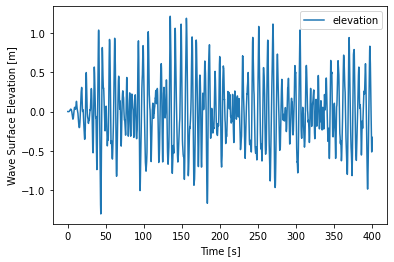

In [5]:
# Plot WEC-Sim output from the Wave Class
wave.plot()
plt.xlabel("Time [s]")
plt.ylabel("Wave Surface Elevation [m]")

## 2.B: Body Class Data

Data from WEC-Sim's [Body Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#body-class) includes information about each body, including the body's position, velocity, acceleration, forces acting on the body, and the body's name. For the RM3 example there will be 2 boides a float and a spar. 

In [6]:
# Store WEC-Sim output from the Body Class to a new dictionary of dataFrames, i.e. `bodies`. 
bodies = wecsim_data['bodies']

# Data fron each body is stored as its own dataFrame, i.e. `body1` and `body2`.
bodies.keys()

dict_keys(['body1', 'body2'])

### Body Class Data for Body 1

Let us detemine which body 'body1' is by requesting the bodie's name. In this this case the body name is 'float'.

In [7]:
# Display the name of Body 1 from the WEC-Sim Body Class
bodies['body1'].name

'float'

We can now look at the data associated with the float by looking at the columns of the DataFrame. Wec-Sim returns 10 simulated values for each DOF (6 DOFs total). Therefor the DataFrame has 60 total columns.

In [8]:
# Number of Unique fields for each DOF
uniqueFields = 10
# Retun a list of each unique field for DOF 1
display(bodies['body1'].keys().values.tolist()[:uniqueFields])

['position_dof1',
 'velocity_dof1',
 'acceleration_dof1',
 'forceTotal_dof1',
 'forceExcitation_dof1',
 'forceRadiationDamping_dof1',
 'forceAddedMass_dof1',
 'forceRestoring_dof1',
 'forceMorrisonAndViscous_dof1',
 'forceLinearDamping_dof1']

### Plot heave position data for Body 1

Because the RM3 device creates power in the heave direction we may want look at the body's motion in the heave direction (DOF 3). Looking at the available variables above we would therefore plot the `postion_dof3`.

max = -0.09745284609265781
min = -1.3264490463816792


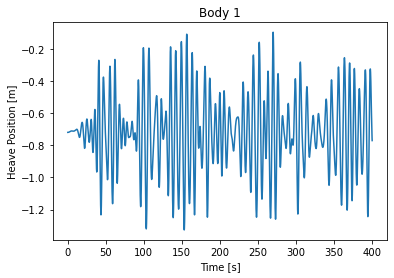

In [9]:
# Use Pandas to plot Body 1 position in heave (DOF 3)
bodies['body1'].position_dof3.plot()
plt.xlabel("Time [s]")
plt.ylabel("Heave Position [m]")
plt.title('Body 1')

# Use Pandas to calculate the maximum and minimum heave position of Body 1 
print("max =", bodies['body1'].position_dof3.max())
print("min =", bodies['body1'].position_dof3.min())

### Plot all position data for Body 1

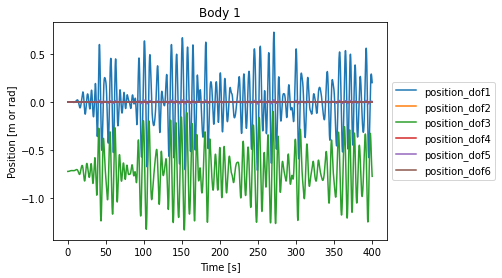

In [10]:
# Store Body Class dataFrame for Body 1 as `body1`. 
body1 = bodies['body1']

# Create a list of Body 1 data columns that start with 'position'
filter_col = [col for col in body1 if col.startswith('position')]

# Plot filtered 'position' data for Body 1
body1[filter_col].plot()
plt.xlabel('Time [s]')
plt.ylabel('Position [m or rad]')
plt.title('Body 1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Body Class Data for Body 2

In [11]:
# Display the name of Body 2 from the WEC-Sim Body Class
display(bodies['body2'].name)

# View the Body Class dataFrame for Body 2
bodies['body2'].head()

'spar'

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceExcitation_dof1,forceRadiationDamping_dof1,forceAddedMass_dof1,forceRestoring_dof1,forceMorrisonAndViscous_dof1,forceLinearDamping_dof1,...,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceExcitation_dof6,forceRadiationDamping_dof6,forceAddedMass_dof6,forceRestoring_dof6,forceMorrisonAndViscous_dof6,forceLinearDamping_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,3.755267e-11,0.002335,0.000000,0.0,-0.002335,0.0,0,0,...,0.0,0.0,0.0,-0.000032,0.000000e+00,0.0,0.000032,0.0,0,0
0.01,1.591394e-14,3.896568e-12,4.658215e-10,0.003717,0.000114,0.0,-0.003603,0.0,0,0,...,0.0,0.0,0.0,-0.000049,3.542912e-11,0.0,0.000049,0.0,0,0
0.02,1.060269e-13,1.600502e-11,1.593218e-09,0.005343,0.000471,0.0,-0.004872,0.0,0,0,...,0.0,0.0,0.0,-0.000068,1.419347e-10,0.0,0.000068,0.0,0,0
0.03,3.850571e-13,4.276105e-11,3.369236e-09,0.006388,0.001097,0.0,-0.005291,0.0,0,0,...,0.0,0.0,0.0,-0.000079,3.198299e-10,0.0,0.000079,0.0,0,0
0.04,1.024419e-12,8.867530e-11,5.507640e-09,0.006671,0.002016,0.0,-0.004656,0.0,0,0,...,0.0,0.0,0.0,-0.000081,5.694090e-10,0.0,0.000081,0.0,0,0


### Plot all heave data for Body 2

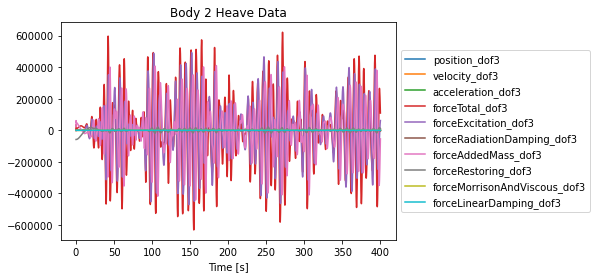

In [12]:
# Store Body Class dataFrame for Body 2 as`body2`. 
body2 = bodies['body2']

# Filter through Body 2 data columns that end with 'dof3'
filter_col = [col for col in body2 if col.endswith('dof3')]

# Plot filtered 'dof3' data for Body 2
body2[filter_col].plot()
plt.xlabel("Time [s]")
plt.title("Body 2 Heave Data")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## PTO Class Data
Data from WEC-Sim's [PTO Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#pto-class) includes relevant information about each pto, including the pto's position, velocity, acceleration, forces acting on the pto, and the pto's name. 

In [13]:
# Store WEC-Sim output from the PTO Class to a dataFrame, called `ptos`
ptos = wecsim_data['ptos']

# Display the name of the PTO from the WEC-Sim PTO Class
display(ptos.name)

# View the PTO Class dataFrame
ptos.head()

'PTO1'

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceActuation_dof1,forceConstraint_dof1,forceInternalMechanics_dof1,powerInternalMechanics_dof1,position_dof2,velocity_dof2,...,forceInternalMechanics_dof5,powerInternalMechanics_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceActuation_dof6,forceConstraint_dof6,forceInternalMechanics_dof6,powerInternalMechanics_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.0,0.0,0.0,-0.000816,0,-0.000816,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0,0.000000e+00,0.0,0.0
0.01,0.0,0.0,0.0,-0.006888,0,-0.006888,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.203132e-11,0,3.203132e-11,0.0,0.0
0.02,0.0,0.0,0.0,-0.010638,0,-0.010638,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.222051e-07,0,1.222051e-07,0.0,0.0
0.03,0.0,0.0,0.0,-0.009266,0,-0.009266,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.338081e-07,0,3.338081e-07,0.0,0.0
0.04,0.0,0.0,0.0,-0.004708,0,-0.004708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.821057e-07,0,5.821057e-07,0.0,0.0


Text(0.5, 1.0, 'PTO')

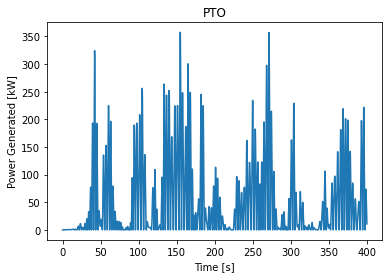

In [14]:
# Use Pandas to plot pto internal power in heave (DOF 3)
# NOTE: WEC-Sim requires a negative sign to convert internal power to generated power
(-1*ptos.powerInternalMechanics_dof3/1000).plot()
plt.xlabel("Time [s]")
plt.ylabel("Power Generated [kW]")
plt.title('PTO')

## Constraint Class Data
Data from WEC-Sim's [Constraint Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#constraint-class) includes relevant information about each constraint, including the constraint's position, velocity, acceleration, forces acting on the constraint, and the constraint's name. 

In [15]:
# Store WEC-Sim output from the Constraint Class to a new dataFrame, called `constraints`
constraints = wecsim_data['constraints']

# Display the name of the Constraint from the WEC-Sim Constraint Class
display(constraints.name)

# View the Constraint Class dataFrame
constraints.head()

'Constraint1'

,position_dof1,velocity_dof1,acceleration_dof1,forceConstraint_dof1,position_dof2,velocity_dof2,acceleration_dof2,forceConstraint_dof2,position_dof3,velocity_dof3,...,acceleration_dof4,forceConstraint_dof4,position_dof5,velocity_dof5,acceleration_dof5,forceConstraint_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceConstraint_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,-2.382255e-10,0.0,0.0,0.0,0.0,-0.000000,0.000000e+00,0.000000,...,0.0,-3.635975,-0.000000e+00,-0.000000e+00,-1.282689e-11,-0.0,0.0,0.0,0.0,1.540744e-33
0.01,-7.759426e-14,-1.900049e-11,-2.327209e-09,0.0,0.0,0.0,0.0,0.001198,1.828372e-07,0.000039,...,0.0,-3.325131,-4.349218e-15,-1.064979e-12,-1.299084e-10,-0.0,0.0,0.0,0.0,3.168962e-05
0.02,-4.942730e-13,-7.203812e-11,-6.948924e-09,0.0,0.0,0.0,0.0,0.002494,8.204026e-07,0.000091,...,0.0,-2.984497,-2.792093e-14,-4.095030e-12,-3.973089e-10,-0.0,0.0,0.0,0.0,6.653120e-05
0.03,-1.677272e-12,-1.739121e-10,-1.255915e-08,0.0,0.0,0.0,0.0,0.003245,2.036965e-06,0.000154,...,0.0,-2.781651,-9.592229e-14,-1.007782e-11,-7.408551e-10,-0.0,0.0,0.0,0.0,8.740991e-05
0.04,-4.117570e-12,-3.216346e-10,-1.705138e-08,0.0,0.0,0.0,0.0,0.003345,3.906279e-06,0.000220,...,0.0,-2.746376,-2.391623e-13,-1.908418e-11,-1.049257e-09,-0.0,0.0,0.0,0.0,9.123985e-05


### Plot all constraint force data

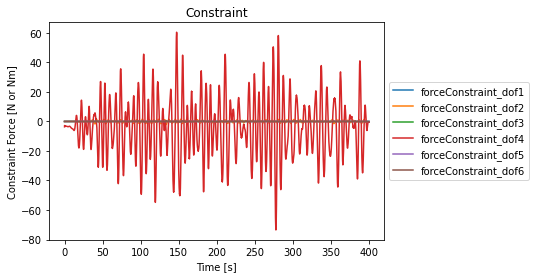

In [16]:
# Filter through the Constraint data columns that start with 'forceConstraint'
filter_col = [col for col in constraints if col.startswith('forceConstraint')]

# Plot filtered 'forceConstraint' data for the Constraint
constraints[filter_col].plot()
plt.xlabel("Time [s]")
plt.ylabel("Constraint Force [N or Nm]")
plt.title('Constraint')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Mooring Class Data
Data from WEC-Sim's [Mooring Class](http://wec-sim.github.io/WEC-Sim/code_structure.html#mooring-class) includes relevant information about the mooring, including the mooring's position, velocity, mooring force, and the mooring's name. 

In [17]:
# Store WEC-Sim output from the Mooring Class to a new dataFrame, called `mooring`
mooring = wecsim_data['mooring']

# View the PTO Class dataFrame
mooring.head()

,position_dof1,velocity_dof1,forceMooring_dof1,position_dof2,velocity_dof2,forceMooring_dof2,position_dof3,velocity_dof3,forceMooring_dof3,position_dof4,velocity_dof4,forceMooring_dof4,position_dof5,velocity_dof5,forceMooring_dof5,position_dof6,velocity_dof6,forceMooring_dof6
time,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0
0.01,-7.759426e-14,-1.900049e-11,7.759426e-09,0.0,0.0,0.0,1.828372e-07,0.000039,0.0,0.0,0.0,0.0,-4.349218e-15,-1.064979e-12,0.0,0.0,0.0,0.0
0.02,-4.942730e-13,-7.203812e-11,4.942730e-08,0.0,0.0,0.0,8.204026e-07,0.000091,0.0,0.0,0.0,0.0,-2.792093e-14,-4.095030e-12,0.0,0.0,0.0,0.0
0.03,-1.677272e-12,-1.739121e-10,1.677272e-07,0.0,0.0,0.0,2.036965e-06,0.000154,0.0,0.0,0.0,0.0,-9.592229e-14,-1.007782e-11,0.0,0.0,0.0,0.0
0.04,-4.117570e-12,-3.216346e-10,4.117570e-07,0.0,0.0,0.0,3.906279e-06,0.000220,0.0,0.0,0.0,0.0,-2.391623e-13,-1.908418e-11,0.0,0.0,0.0,0.0


### Plot all mooring force data

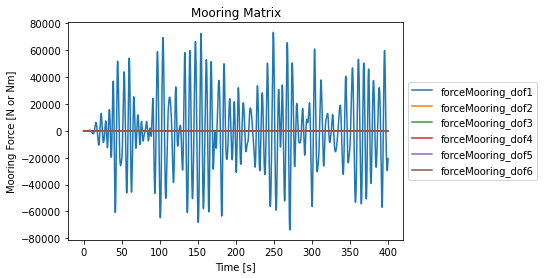

In [18]:
# Filter through the Mooring data columns that start with 'forceMooring'
filter_col = [col for col in mooring if col.startswith('forceMooring')]

# Plot filtered 'forceMooring' data for the Mooring
mooring[filter_col].plot()
plt.xlabel("Time [s]")
plt.ylabel("Mooring Force [N or Nm]")
plt.title('Mooring Matrix')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Apply MHKiT Wave Module

In [19]:
# Use the MHKiT Wave Module to calculate wave spectrum from the WEC-Sim Wave Class Data, called `wave`
ws_spectrum = mhkit.wave.resource.elevation_spectrum(wave,60,1000)

# Plot calcualed wave Spectrum
spect_plot = mhkit.wave.graphics.plot_spectrum(ws_spectrum)

NameError: name 'mhkit' is not defined

In [ ]:
# Calculate Peak Wave Period (Tp) and Significant Wave Height(Hm0)
Tp = mhkit.wave.resource.peak_period(ws_spectrum)
Hm0 = mhkit.wave.resource.significant_wave_height(ws_spectrum)

# Display calculated Peak Wave Period (Tp) and Significant Wave Height(Hm0)
display(Tp,Hm0)